In [56]:
#!/Tsan/bin/python
# -*- coding: utf-8 -*-

In [57]:
# Libraries to use
from __future__ import division 
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [58]:
# Import My own library for factor testing
import factorFilterFunctions as ff
#from config import *

In [59]:
%matplotlib inline

In [60]:
%load_ext line_profiler

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [61]:
# make sure that matplotib and seaborn can show Chinese
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['font.serif'] = ['SimHei']
sns.set_style("darkgrid",{"font.sans-serif":['simhei', 'Arial']})

In [62]:
# Files to use 
filenamePrice='LZ_GPA_DERI_AdjustedPriceForward_20.csv'
filenameST='LZ_GPA_SLCIND_ST_FLAG.csv'
filenameTradeday='LZ_GPA_SLCIND_TRADEDAYCOUNT.csv'
filenameStopFlag='LZ_GPA_SLCIND_STOP_FLAG.csv'
filenameIndu='LZ_GPA_INDU_ZX.csv'
filenameFCAP='LZ_GPA_VAL_A_FCAP.csv'
filenameAdjustFactor='LZ_GPA_CMFTR_CUM_FACTOR.csv'
filenameHS300 = 'LZ_GPA_INDXQUOTE_CLOSE.csv'
filenameZXIndustry = 'LZ_GPA_INDU_ZX.csv'
filenameZXExplanation = 'LZ_GPA_TMP_INDU_ZX.csv'

In [607]:
# Factors
# Value factor
filenamePE ='LZ_GPA_VAL_PE.csv'  # 市盈率   012-2016 Cum return 0.9(group1),1.4(group8) monotonicity: Normal
filenamePB ='LZ_GPA_VAL_PB.csv'  # 市净率   012-2016 Cum return 1.1(group2),0.1(group9) monotonicity: Good+
filenamePS = 'LZ_GPA_VAL_PS.csv' # 市销率   012-2016 Cum return 0.9(group0),0.3(group9) monotonicity: Good+
filenamePCF = 'LZ_GPA_VAL_PC.csv' # 市现率   2012-2016 Cum return 0.95(group0),0.35(group8) monotonicity: Normal
filenameADJPB ='Own_Factor_AdjustedPB-1d.csv' # 市值调整市净率 2012-2016 Cum return 1.1(group2),0.2(group9) monotonicity: Normal

# Growth factor
filenameYOYGR = 'LZ_GPA_FIN_IND_QFA_YOYGR.csv'  # 单季度.营业总收入同比增长率(%) 2012-2016 Cum return 1.1(group8),0.41(group1) monotonicity: Good+
filenameYOYNETPROFIT = 'LZ_GPA_FIN_IND_QFA_YOYNETPROFIT.csv' # 单季度.归属母公司股东的净利润同比增长率(%) 2012-2016 Cum return 1.2(group9),0.2(group1) monotonicity: Good
filenameYOYOCF = 'LZ_GPA_FIN_IND_YOYOCF.csv' # 同比增长率-经营活动产生的现金流量净额(%) 2012-2016 Cum return 0.98(group8),0.4(group2) monotonicity: Good
filenameYOYROE = 'LZ_GPA_FIN_IND_YOYROE.csv' # 同比增长率-净资产收益率(摊薄)(%) 2012-2016 Cum return 1.17(group7),0.18(group1) monotonicity: Normal
filenameYOYBPS = 'LZ_GPA_FIN_IND_YOYBPS.csv' # 相对年初增长率-每股净资产(%)  2012-2016 Cum return 0.85(group4),0.5(group0) monotonicity: Normal

# Financial factor
filenameCAPITALIZEDTODA = 'LZ_GPA_FIN_IND_CAPITALIZEDTODA.csv'  # 资本支出/折旧和摊销 2012-2016 Cum return 0.95(group0),0.6(group9) monotonicity: Normal+
filenameCASHRATIO = 'LZ_GPA_FIN_IND_CASHRATIO.csv' # 保守速动比率 2012-2016 Cum return 0.85(group0),0.53(group2) monotonicity: Normal+
filenameCASHTOLIQDEBT = 'LZ_GPA_FIN_IND_CASHTOLIQDEBT.csv' # 货币资金／流动负债 2012-2016 Cum return 0.8(group7),0.6(group8) monotonicity: Normal
filenameOCFTODEBT = 'LZ_GPA_FIN_IND_OCFTODEBT.csv' # 经营活动产生的现金流量净额/负债合计 2012-2016 Cum return 0.8(group0),0.55(group4) monotonicity: Normal
filenamePROFITTOOP = 'LZ_GPA_FIN_IND_PROFITTOOP.csv' # 利润总额／营业收入 2012-2016 Cum return 0.84(group3),0.23(group9) monotonicity: Normal
filenamePROFITTOOPTTM ='LZ_GPA_FIN_DERI_COMBO_EBTTOOR_TTM.csv' # # 利润总额／营业收入(TTM) 2012-2016 Cum return 0.72(group8),0.41(group1) monotonicity: Good

filenameBERYRATIO = 'LZ_GPA_DERI_BerryRatio.csv' #边际毛利/营运开支 2012-2016  monotonicity: bad ,not useful at all

# Momentum factor
filenameTRUEMOM = 'LZ_GPA_USR_MOM.csv' # 真动量 2012-2016 Cum return 1.0(group3), - 0.3(group9) monotonicity: Normal+
filenameMOM1M = 'LZ_GPA_DERI_Momentum_1M.csv' # 一月反转 2012-2016 Cum return 0.85(group0), - 0.2(group9) monotonicity: Good
filenameMOM3M = 'LZ_GPA_TURNOVER_TurnoverAvg_3M.csv' # 三月反转 2012-2016 Cum return 0.65(group7), 0.4(group9) monotonicity: Normal
filenamePVO = 'LZ_GPA_DERI_PVO.csv' # 一年偏度  2012-2016 Cum return 0.47(group0), -0.3(group9) monotonicity: Good
filenameABORMALVOLUME = 'LZ_GPA_DERI_NormalizedAbormalVolume.csv' # 归一化异常交易量  2012-2016 Cum return 0.7(group0), 0.1(group9) monotonicity: Normal
filenameSKEW = 'LZ_GPA_DERI_TSKEW.csv' # 斜率   2012-2016 Cum return 1.1(group0), 0.25(group8) monotonicity: Good+
filenameMACD = 'LZ_GPA_DERI_MACD.csv'  # MACD   2012-2016 Cum return 0.8(group3), -0.4(group9) monotonicity: Normal
finenameBB = 'LZ_GPA_DERI_BB_20.csv'  # Bolling_bands  2012-2016 Cum return 0.75(group3) , 0.05(group9)  monotonicity: Normal 

# Liquidity factor
filenameTURNOVER1M = 'LZ_GPA_TURNOVER_TurnoverAvg_1M.csv' # 一月换手率均值 2012-2016 Cum return 0.7(group4) , 0.1(group9)  monotonicity: Normal 
filenameAMOUNTAVG1M = 'LZ_GPA_DERI_AmountAvg_1M.csv'    #  日均成交额   2012-2016 Cum return 1.52(group0) , -0.27(group9)  monotonicity: Perfect
filenameILLIQ = 'LZ_GPA_DERI_ILLIQ.csv'         # 非流动性因子  2012-2016 Cum return 1.5(group9), - 0.07(group1) monotonicity: Perfect
filenameTURNOVER = 'LZ_GPA_VAL_TURN.csv'    #换手率 2012-2016 Cum return  0.78(group6), - 0.25(group9) monotonicity: Normal（除了第九组外其他差不多）
filenameOWNILLIQ ='Own_Factor_ILLQ-1d.csv' # 非流动性 2012-2016 Cum return 1.5(group9), - 0.25(group0) monotonicity: Perfect
filenameADJTURNOVER = 'LZ_GPA_DERI_adjustedTurnOver_20.csv' # 市值调整日均成交额 2012-2016 Cum return 1.25(group0), - 0.5(group9) monotonicity: Perfect

# Volatility factor
filenameRV1Y = 'LZ_GPA_DERI_RealizedVolatility_1Y.csv' # 一年收益波动   2012-2016 Cum return  0.65(group8), 0.4(group1) monotonicity : Normal
filenameOwnVol = 'Own_Factor_Volatility_90d.csv'   # 90天收益波动率     2012-2016 Cum return 0.65(group1), - 0.26(group9) monotonicity: Good
filenameAbove20 = 'Own_Factor_Above20MA_20d.csv'  # 高于20天MA的价格平均 2012-2016 Cum return 0.8(group1) , -0.4(group9)  monotonicity：Good

filenameTOV20 = 'Own_Factor_Turnover_Volatility_20D.csv' # 20天换手率波动率
filenameADJTOV20 = 'Own_Factor_ADJ_Turnover_Volatility_20D.csv' # 20天换手率波动率（市值调整） 2012-2016 Cum return 1.8(group0), -0.3(group9) monotonicity: perfect
filenameTOVD20 = 'Own_Factor_Turnover_Volatility_deviation_20D.csv' # 20天换手率均值除500天换手率均值-1
filenameADJTOVD20 = 'Own_Factor_ADJ_Turnover_Volatility_Deviation_20D.csv' # 20天换手率均值除500天换手率均值-1(市值调整)  Cum return 0.7(group0), -0.2(group9)Good

In [64]:
#
#filenameSpecificVol = 'Own_Factor_Specific_Volatility.csv' # 特质波动率
filenameAroon = 'Aroon_Allstocks.csv' 
filenameAdjTOTrue = 'Own_Factor_AdjustedTurnOver-1d.csv'# 真市值调整换手率 2012-2016 Cum return 1.0(group7), - 0.4(group9) monotonicity: Normal
filenameDDA = 'Own_Factor_DDA-1d.csv'  # 股票每日成交额(前复权)  2012-2016 Cum return 2.2(group0), - 0.6(group9) monotonicity: Perfect
filennameQFAEPS = 'LZ_GPA_FIN_IND_QFA_EPS.csv' # 单季度每股收益
filenameDDA20 = 'Own_Factor_DDA-20d.csv' # DDA二十天均值   2012-2016 Cum return 2.2(group0), - 0.6(group9) monotonicity: Perfect
filenameIDIVOL = 'Own_Factor_Idiosyncratic_Volatility.csv' # 特异波动率  2012-2016 Cum return 0.9(group1), 0(group9) monotonicity: Good+
filenameOwnSkewness = 'Own_Factor_Skewness_250d.csv'  # 250日偏度
filenamePPO ='LZ_GPA_DERI_PPO.csv' #



In [290]:
# Not good factors but maybe useful
filenameOVERVOL = 'Over_Heat_Volume.csv' 
filenameSIZE = 'LZ_GPA_VAL_A_FCAP.csv'

In [291]:
# Constants
startTime =  datetime.strptime('20120401', '%Y%m%d')
endTime = datetime.strptime('20161230', '%Y%m%d')

path = ff.data_path
timeStampNum = 2500
thresholdNum = 0.2
HS300Index ='000300.SH' # HS300 index code
ZZ500Index = '000905.SH' #   ZZ500 index code

In [696]:
#
sololist = [filenameADJTOVD20]
#
filenameDict = {'PE':filenamePE,'PB':filenamePB, 'PS':filenamePS, 'PCF':filenamePCF, 'YOYGR':filenameYOYGR,'YOYGRPROFIT':filenameYOYNETPROFIT, \
                'TRUE_MOM':filenameTRUEMOM, 'MOM_1M':filenameMOM1M , 'TURNOVER_1M':filenameTURNOVER1M }

In [697]:
stDF = pd.read_csv(path+filenameST,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime]
tradeDayDF = pd.read_csv(path+filenameTradeday,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime]
stopFlagDF = pd.read_csv(path+filenameStopFlag,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime]
indusDF = pd.read_csv(path+filenameZXIndustry,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime]
induExplanation = pd.read_csv(path+filenameZXExplanation,infer_datetime_format=True,parse_dates=[0],encoding='gb2312')

In [698]:
induExplanation

,LZ_GPA_TMP_INDU_ZX-t
0,石油石化
1,煤炭
2,有色金属
3,电力及公用事业
4,钢铁
5,基础化工
6,建筑
7,建材
8,轻工制造
9,机械


In [699]:
explanationDict = induExplanation.iloc[:,0].to_dict()

In [700]:
stDF.head()

,000005.SZ,600601.SH,600602.SH,600651.SH,600652.SH,600653.SH,600654.SH,600656.SH,000004.SZ,000002.SZ,...,603139.SH,603232.SH,002865.SZ,300648.SZ,603096.SH,002866.SZ,300514.SZ,603920.SH,002867.SZ,603787.SH
LZ_GPA_SLCIND_ST_FLAG-t,,,,,,,,,,,,,,,,,,,,,
2012-04-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-04-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-04-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-04-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-04-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [701]:
## easy way to calculate the last day of the month
stDF['label'] = stDF.index.map(lambda x: (x.year,x.month))
#locationList=(stDF.groupby(['label']).size().cumsum()-1).values
#stDF.iloc[locationList].index
stDF.groupby(['label'])

In [702]:
priceData =  pd.read_csv(path+ filenamePrice ,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime]
benchMarkData = pd.read_csv(path+filenameHS300,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime][ZZ500Index]

In [703]:
LFCAPDF = np.log10(ff.getData(filenameFCAP, thresholdNum, startTime, endTime))

In [704]:
endOfMonthList = ff.getLastDayOfMonth(LFCAPDF.index)[1]

In [705]:
#%lprun -f ff.getLastDayOfMonth ff.getLastDayOfMonth(LFCAPDF.index)

In [706]:
activeReturnData =ff.calcReturn(priceData, endOfMonthList, benchmark = benchMarkData,activeReturn = True,logReturn = False)

In [707]:
# Generate the useles stock list
filterdict={}
for i in endOfMonthList:
    suspendList = ff.GetSTNewSuspend(i,stDF,tradeDayDF,stopFlagDF)
    filterdict[i] = suspendList
    print i, len(filterdict[i])

2012-04-27 00:00:00 376
2012-05-31 00:00:00 316
2012-06-29 00:00:00 322
2012-07-31 00:00:00 262
2012-08-31 00:00:00 244
2012-09-28 00:00:00 229
2012-10-31 00:00:00 208
2012-11-30 00:00:00 202
2012-12-31 00:00:00 192
2013-01-31 00:00:00 186
2013-02-28 00:00:00 186
2013-03-29 00:00:00 194
2013-04-26 00:00:00 188
2013-05-31 00:00:00 182
2013-06-28 00:00:00 190
2013-07-31 00:00:00 199
2013-08-30 00:00:00 196
2013-09-30 00:00:00 198
2013-10-31 00:00:00 205
2013-11-29 00:00:00 220
2013-12-31 00:00:00 207
2014-01-30 00:00:00 244
2014-02-28 00:00:00 267
2014-03-31 00:00:00 303
2014-04-30 00:00:00 284
2014-05-30 00:00:00 287
2014-06-30 00:00:00 302
2014-07-31 00:00:00 304
2014-08-29 00:00:00 329
2014-09-30 00:00:00 320
2014-10-31 00:00:00 344
2014-11-28 00:00:00 377
2014-12-31 00:00:00 367
2015-01-30 00:00:00 388
2015-02-27 00:00:00 397
2015-03-31 00:00:00 482
2015-04-30 00:00:00 482
2015-05-29 00:00:00 575
2015-06-30 00:00:00 637
2015-07-31 00:00:00 674
2015-08-31 00:00:00 628
2015-09-30 00:00

In [708]:
### Calculate the return of each group of given factor(solo factor)
totalGroupDict ={}
factorData = ff.getData(sololist[0], thresholdNum, startTime, endTime)
for date in endOfMonthList:
    factorDataTemp = factorData.loc[:date].tail()
    factorDataTemp = factorDataTemp[list(set(factorDataTemp.columns.tolist())- set(filterdict[date]))]
    #print factorDataTemp
    totalGroupDict[date] = ff.getStockGroup(factorDataTemp,groupNum=10,Mean_Num=1)

In [709]:
ReturnDF = pd.DataFrame(index=endOfMonthList[:-1],columns=totalGroupDict.values()[0].keys(),data=None)
for group in ReturnDF.columns.tolist():
    for time in ReturnDF.index:
        ReturnDF.loc[time][group] = activeReturnData.loc[time][totalGroupDict[time][group]].mean()
ReturnDF.sort_index(axis=1,inplace=True)

In [710]:
shapeRatio = ReturnDF.mean()/ReturnDF.std()
shapeRatio

group_0    0.578246
group_1    0.500743
group_2    0.529233
group_3    0.465438
group_4    0.452208
group_5    0.426115
group_6    0.371816
group_7    0.365624
group_8    0.234455
group_9   -0.109047
dtype: float64

In [711]:
### Method to calculate moving max drawdown
from numpy.lib.stride_tricks import as_strided
def windowed_view(x, window_size):
    """Creat a 2d windowed view of a 1d array.

    `x` must be a 1d numpy array.

    `numpy.lib.stride_tricks.as_strided` is used to create the view.
    The data is not copied.

    Example:

    >>> x = np.array([1, 2, 3, 4, 5, 6])
    >>> windowed_view(x, 3)
    array([[1, 2, 3],
           [2, 3, 4],
           [3, 4, 5],
           [4, 5, 6]])
    """
    y = as_strided(x, shape=(x.size - window_size + 1, window_size),
                   strides=(x.strides[0], x.strides[0]))
    return y

In [712]:
###
def rolling_max_dd(x, window_size, min_periods=1):
    """Compute the rolling maximum drawdown of `x`.

    `x` must be a 1d numpy array.
    `min_periods` should satisfy `1 <= min_periods <= window_size`.

    Returns an 1d array with length `len(x) - min_periods + 1`.
    """
    if min_periods < window_size:
        pad = np.empty(window_size - min_periods)
        pad.fill(x[0])
        x = np.concatenate((pad, x))
    y = windowed_view(x, window_size)
    #print y
    rolling_max_y = np.maximum.accumulate(y, axis=1)
    #print rolling_max_y
    dd = 1-y/rolling_max_y
    return np.abs(dd).max(axis=1)

In [713]:
max(rolling_max_dd(ReturnDF['group_0'].values,4, min_periods=1))

29.961428225724905

In [714]:
ReturnDF.cumsum().tail()

,group_0,group_1,group_2,group_3,group_4,group_5,group_6,group_7,group_8,group_9
2016-07-29,0.693414,0.585852,0.593755,0.522489,0.506095,0.495777,0.471623,0.467989,0.283034,-0.228955
2016-08-31,0.708671,0.597362,0.608174,0.541919,0.516103,0.506457,0.475973,0.476523,0.30104,-0.235919
2016-09-30,0.724302,0.622446,0.623537,0.554299,0.52259,0.51847,0.486383,0.47376,0.311132,-0.221135
2016-10-31,0.73783,0.634771,0.628434,0.566617,0.535444,0.530746,0.47855,0.471519,0.319998,-0.232063
2016-11-30,0.737589,0.638484,0.635478,0.569921,0.545757,0.531723,0.492591,0.485588,0.338837,-0.214791


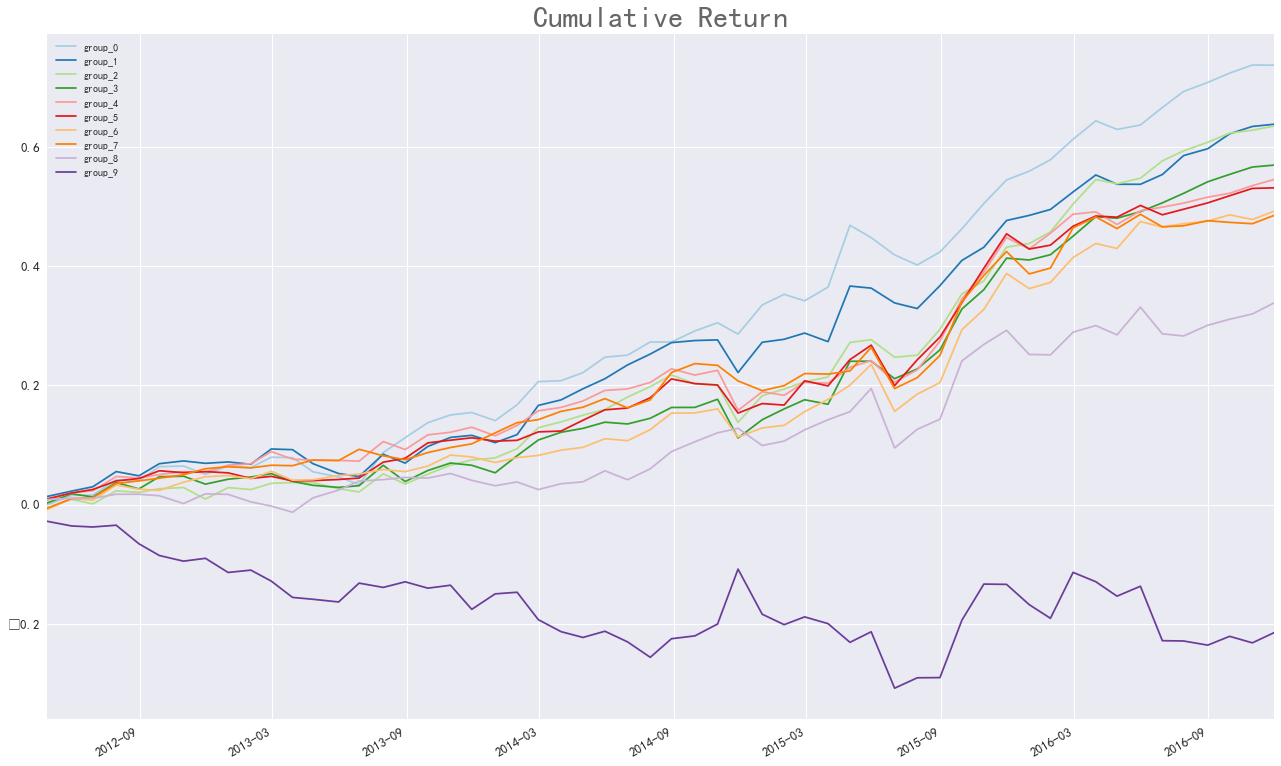

In [715]:
# simple cumulative return 
fig = plt.figure(figsize=(18,14))
# Add a subplot
ax = fig.add_subplot(111)
ReturnDF.astype(float).cumsum().plot(figsize=(22,14),ax=ax,  color=sns.color_palette("Paired",10),fontsize =13,title ='Cumulative Return')
ax.set_title(ax.get_title(),alpha=0.7, fontsize=30)

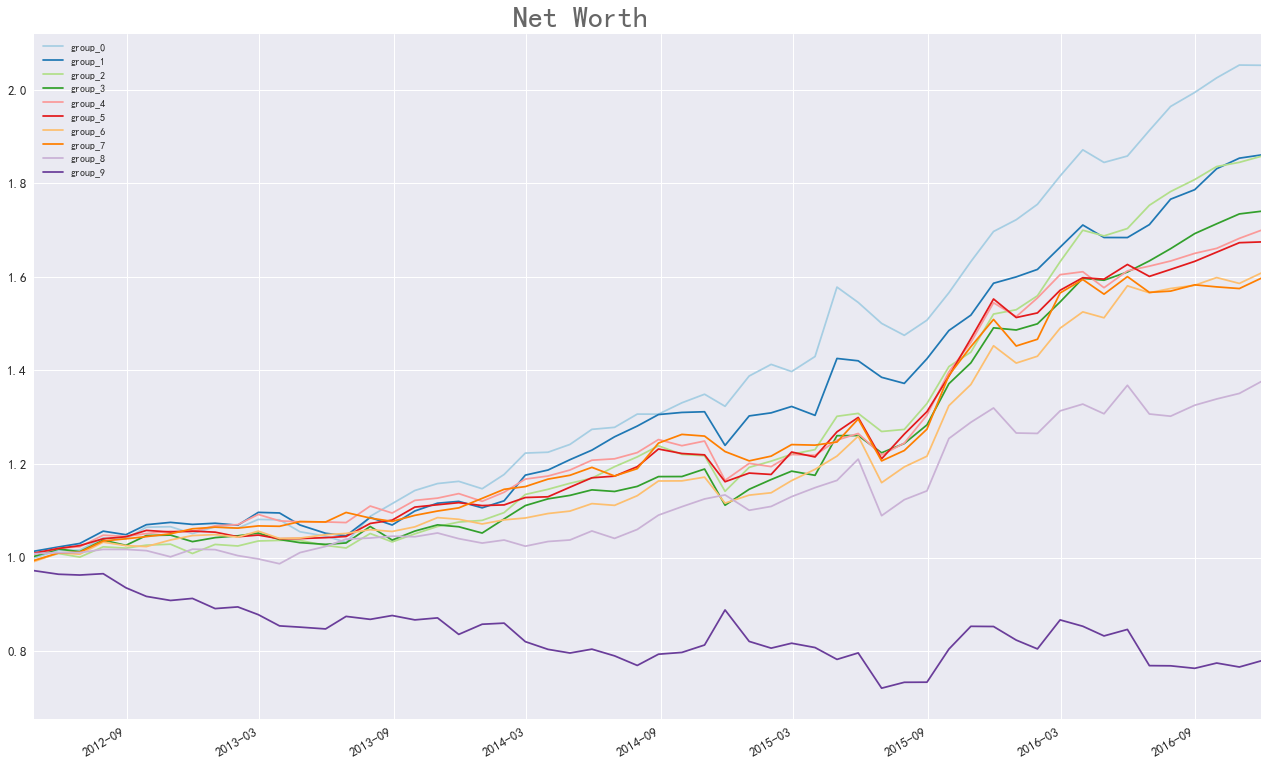

In [716]:
# Net worth plot 
fig = plt.figure(figsize=(18,14))
# Add a subplot
ax = fig.add_subplot(111)
(ReturnDF.astype(float)+1).cumprod().plot(figsize=(22,14),ax=ax,color=sns.color_palette("Paired",10),title ='Net Worth',fontsize =13)
ax.set_title(ax.get_title(),alpha=0.7, fontsize=30, ha='right')

In [717]:
ReturnDF.head()

,group_0,group_1,group_2,group_3,group_4,group_5,group_6,group_7,group_8,group_9
2012-04-27,-0.000872524,0.0134655,-0.00605876,0.00228977,0.00691983,0.00939995,-0.00880506,-0.00633184,0.00840482,-0.0278658
2012-05-31,0.0161921,0.00917036,0.0148749,0.0159427,0.0130229,0.0100727,0.0191419,0.0163532,0.00222248,-0.0079775
2012-06-29,0.000811309,0.00728897,-0.00766483,-0.00554386,0.00307355,0.00591117,-0.00298438,0.0015987,-1.35646e-05,-0.00174284
2012-07-31,0.0255391,0.0255086,0.0220138,0.0243899,0.0241948,0.0143144,0.025621,0.023772,0.00678043,0.00296957
2012-08-31,-0.00184606,-0.00715173,-0.00267261,-0.0107501,-0.00254609,0.00408032,-0.00709987,0.00441328,-1.63536e-05,-0.0311134


In [718]:
ReturnForPlot =ReturnDF.copy()

In [719]:
ReturnForPlot.index = ReturnForPlot.index.map(lambda x:100*x.year+(1+x.month) if x.month < 12 else\
                                             100*(x.year+1)+1) ### this shows the real time

In [720]:
### the following part is to save return data of every factor into one Dataframe

totalGroupDict ={}
finalDF = pd.DataFrame()
countNum = 0
for i,j in filenameDict.iteritems():
    
    for date in endOfMonthList:
        factorData = ff.getData(j, timeStampNum, thresholdNum)
        factorDataTemp = factorData.loc[:date].tail()
        factorDataTemp = factorDataTemp[list(set(factorDataTemp.columns.tolist())- set(filterdict[date]))]
        #print factorDataTemp
        totalGroupDict[date] = ff.getStockGroup(factorDataTemp,Mean_Num=1)
    ReturnDF = pd.DataFrame(index=endOfMonthList[:-1],columns=totalGroupDict.values()[0].keys(),data=None)
    for group in ReturnDF.columns.tolist():
        for time in ReturnDF.index:
            ReturnDF.loc[time][group] = activeReturnData.loc[time][totalGroupDict[time][group]].mean()
    ReturnDF['factorName'] = i
    if countNum ==0:
        finalDF = ReturnDF
    else:
        finalDF=finalDF.append(ReturnDF)
    countNum+=1
finalDF.sort_index(axis=1,inplace=True)
    #totalGroupDict

In [721]:
#finalDF.shape

In [722]:
#---------------- the following part shows the show the difference of a risk factor across different market capitalzation size----#
#-------------  and different industries ------#

In [723]:
# show the difference of a risk factor through different market capitalzation size
# capdata should not contain Nan value
# Return: DICTIONARY, the KEY is the date and the Value is the tuple of the groups
# Inputs: 
# capdata: DATAFRAME ,the LFCAP DATA
# datelist: LIST, the datelist of the end month
def getGroupsbyCap(capdata, datelist):
    capdict ={}
    for date in datelist:
        capdataindice = capdata.loc[date]
        lower = capdataindice.quantile(1/3)
        upper = capdataindice.quantile(2/3)
        smallcap = capdataindice[capdataindice<=lower].index
        midcap = capdataindice[(lower<capdataindice) & (capdataindice<=upper)].index
        hugecap = capdataindice[capdataindice>upper].index
        capdict[date] = (smallcap,midcap,hugecap)
    return capdict

In [724]:
# industry number
grouplabel = np.random.choice(29,10,replace=False)
grouplabel

array([11, 10, 13, 23, 27, 20,  4,  6, 15, 19])

In [725]:
# show the difference of a risk factor through different industry
# capdata should not contain Nan value
# Return: DICTIONARY, the KEY is the date and the Value is the DICTIONARY of the groups of each industry on that day
# Inputs: 
# datelist: LIST, the datelist of the end month
# grouplable: LIST, the industry label,usually 3 of them is constant and other 3 is randomed  alike [2,3,6,15,18,25]
# industryDF: DATAFRAME,the industry dataframe(could )
def getIndustryDict(datelist,grouplabel,industryDF):
    industrydict = {}
    industryDF = industryDF.loc[datelist]
    for date in datelist:
        industryDFindice = industryDF.loc[date]
        industrydict[date] = {label:industryDFindice[industryDFindice == label].index for label in grouplabel}
    return industrydict

In [726]:
industryDict = getIndustryDict(endOfMonthList,grouplabel,indusDF)

In [727]:
capDict=getGroupsbyCap(LFCAPDF,endOfMonthList)

In [728]:
templist=[endOfMonthList,['mean','median','std']]
capGroupsDF = pd.DataFrame(data=None, columns=['small','mid','huge'],index=pd.MultiIndex.from_product(templist,names=['time','stats']),dtype=float)
indusGroupDF  = pd.DataFrame(data=None, columns=grouplabel,index=pd.MultiIndex.from_product(templist,names=['time','stats']),dtype=float)

In [729]:
for date in endOfMonthList:
    factorindice = factorData.loc[date]
    smallindice = factorindice.loc[list(set(factorindice.index) & set(capDict[date][0]))]
    midindice = factorindice.loc[list(set(factorindice.index) & set(capDict[date][1]))]
    hugeindice = factorindice.loc[list(set(factorindice.index) & set(capDict[date][2]))]
    capGroupsDF.loc[date,'small'] = [smallindice.mean(),smallindice.median(),smallindice.std()]
    capGroupsDF.loc[date,'mid'] = [midindice.mean(),midindice.median(),midindice.std()]
    capGroupsDF.loc[date,'huge'] = [hugeindice.mean(),hugeindice.median(),hugeindice.std()]
    for i in grouplabel:
        #print grouplabel
        inDFIndice = factorindice.loc[list(set(factorindice.index) & set(industryDict[date][i]))]
        indusGroupDF.loc[date,i] = [inDFIndice.mean(),inDFIndice.median(),inDFIndice.std()]
indusGroupDF.rename(columns = {i:u''+explanationDict[i]+'' for i in grouplabel},inplace=True)

In [730]:
indusGroupDF.head(10)

国防军工      电力设备      商贸零售      交通运输        传媒        银行  \
time       stats                                                                
2012-04-27 mean   -0.234682  0.030150 -0.142156  0.569746 -0.273172 -0.157520   
           median -0.341466 -0.302200 -0.297544  0.252578 -0.406372 -0.187258   
           std     0.543577  1.587039  0.728007  1.356008  0.538195  0.436972   
2012-05-31 mean   -0.241289  0.111713 -0.178374  0.153931 -0.310442 -0.004423   
           median -0.362386 -0.237230 -0.385913 -0.172764 -0.444610 -0.208992   
           std     0.572633  1.239107  0.683465  1.388892  0.571639  0.695323   
2012-06-29 mean   -0.142012 -0.032052 -0.229886  0.275525 -0.155012 -0.078036   
           median -0.389499 -0.334523 -0.464253 -0.096608 -0.367313 -0.256962   
           std     0.740286  1.294177  0.739114  1.404883  0.705559  0.731709   
2012-07-31 mean   -0.187281 -0.122113 -0.241590  0.104571 -0.192219  0.291571   

                         钢铁        建筑        家电      农林牧渔  
time       stats                                           
2012-04-27 mean   -0.164251 -0.078635 -0.078829  0.165959  
           median -0.331536 -0.309071 -0.210835 -0.069391  
           std     0.611045  0.944071  0.654851  1.030349  
2012-05-31 mean   -0.058269 -0.110884  0.060009  0.591417  
           median -0.278803 -0.406438 -0.312054  0.238744  
           std     1.121925  0.947880  1.289489  1.503592  
2012-06-29 mean    0.318999 -0.020463 -0.084523  0.346110  
           median  0.053848 -0.365591 -0.337719  0.050364  
           std     1.306223  1.161611  0.672920  1.085159  
2012-07-31 mean   -0.141276 -0.009106  0.213091  0.513341

In [731]:
capGroupsDF.head()

small       mid      huge
time       stats                               
2012-04-27 mean   -0.108819 -0.014890  0.014390
           median -0.365724 -0.219328 -0.206273
           std     1.148430  0.881143  0.931790
2012-05-31 mean   -0.126169 -0.044521  0.007410
           median -0.371793 -0.286602 -0.246248

In [732]:
newstack = capGroupsDF.stack().unstack('stats').reset_index()
newstack = newstack.rename(columns = {'level_1':'cap'})
newstack = newstack.pivot_table(index='time',columns='cap')

In [733]:
newstack.head()

stats           mean                        median                      \
cap             huge       mid     small      huge       mid     small   
time                                                                     
2012-04-27  0.014390 -0.014890 -0.108819 -0.206273 -0.219328 -0.365724   
2012-05-31  0.007410 -0.044521 -0.126169 -0.246248 -0.286602 -0.371793   
2012-06-29  0.003317 -0.095010 -0.005391 -0.211692 -0.367158 -0.307896   
2012-07-31 -0.018264 -0.064111 -0.017871 -0.261286 -0.391787 -0.359359   
2012-08-31 -0.026145  0.043000 -0.055334 -0.228332 -0.321830 -0.292982   

stats            std                      
cap             huge       mid     small  
time                                      
2012-04-27  0.931790  0.881143  1.148430  
2012-05-31  1.028860  0.919888  0.919541  
2012-06-29  0.879368  0.957912  1.117351  
2012-07-31  0.829526  1.034729  1.086886  
2012-08-31  0.791640  1.119627  0.997926

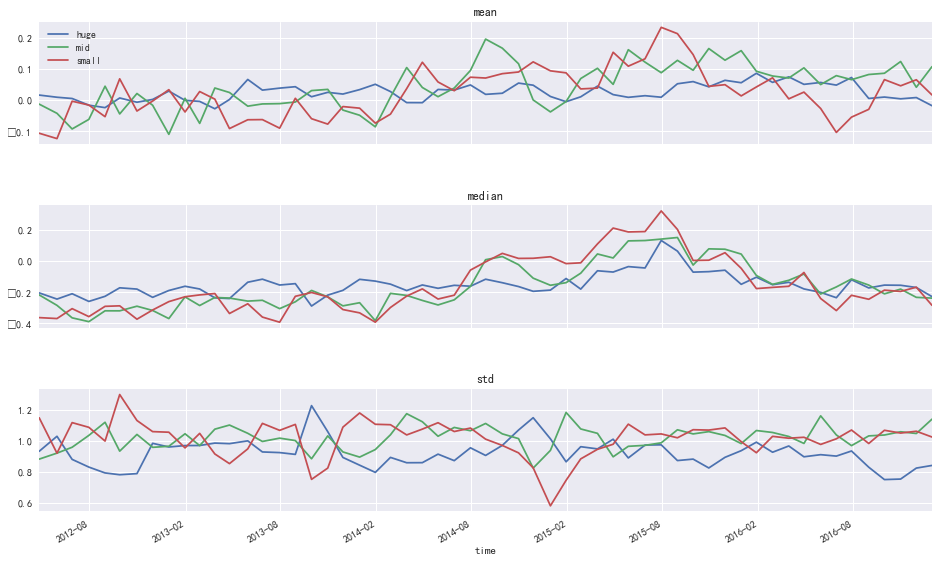

In [734]:
fig, axs = plt.subplots(3,1, figsize=(16, 10), facecolor='w', edgecolor='k',sharex=True)
fig.subplots_adjust(hspace = .5, wspace=.001)
for label,num in zip(newstack.columns.levels[0],range(len(newstack.columns.levels[0]))):
    newstack[label].plot(ax=axs[num],legend=False)
    axs[num].set_title(label)
axs[0].legend()

In [735]:
newstackInd = indusGroupDF.stack().unstack('stats').reset_index()
newstackInd = newstackInd.rename(columns = {'level_1':'industry'})
newstackInd = newstackInd.pivot_table(index='time',columns='industry')

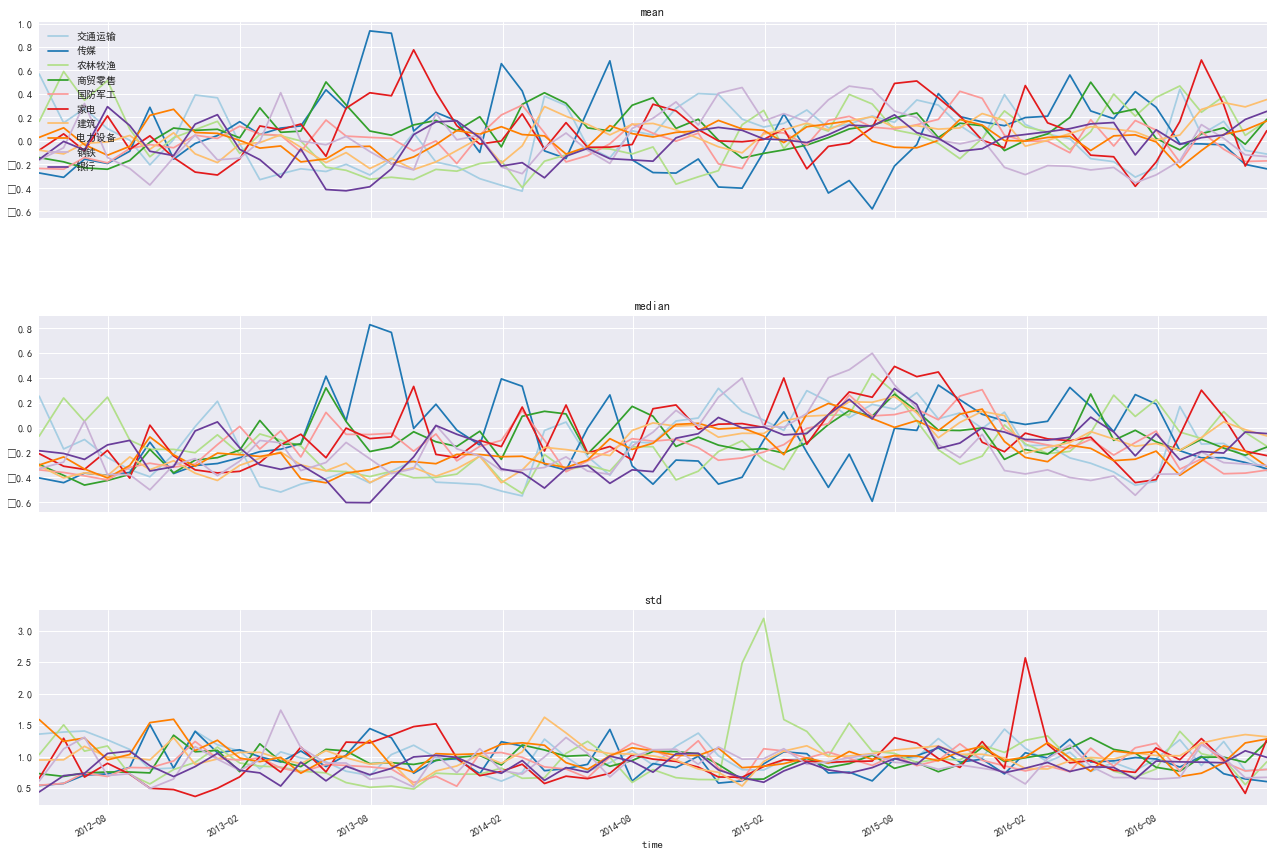

In [736]:
fig, axs = plt.subplots(3,1, figsize=(22, 16), facecolor='w', edgecolor='k',sharex=True)
fig.subplots_adjust(hspace = .5, wspace=.001)
for label,num in zip(newstackInd.columns.levels[0],range(len(newstackInd.columns.levels[0]))):
    newstackInd[label].plot(ax=axs[num],color=sns.color_palette("Paired",10),legend=False)
    axs[num].set_title(label)
axs[0].legend()

In [737]:
capcopy=capGroupsDF.copy()
copydata=capcopy.reset_index()

In [738]:
copydata.pivot_table(index='time',columns='stats').head()

small                           mid                      \
stats           mean    median       std      mean    median       std   
time                                                                     
2012-04-27 -0.108819 -0.365724  1.148430 -0.014890 -0.219328  0.881143   
2012-05-31 -0.126169 -0.371793  0.919541 -0.044521 -0.286602  0.919888   
2012-06-29 -0.005391 -0.307896  1.117351 -0.095010 -0.367158  0.957912   
2012-07-31 -0.017871 -0.359359  1.086886 -0.064111 -0.391787  1.034729   
2012-08-31 -0.055334 -0.292982  0.997926  0.043000 -0.321830  1.119627   

                huge                      
stats           mean    median       std  
time                                      
2012-04-27  0.014390 -0.206273  0.931790  
2012-05-31  0.007410 -0.246248  1.028860  
2012-06-29  0.003317 -0.211692  0.879368  
2012-07-31 -0.018264 -0.261286  0.829526  
2012-08-31 -0.026145 -0.228332  0.791640

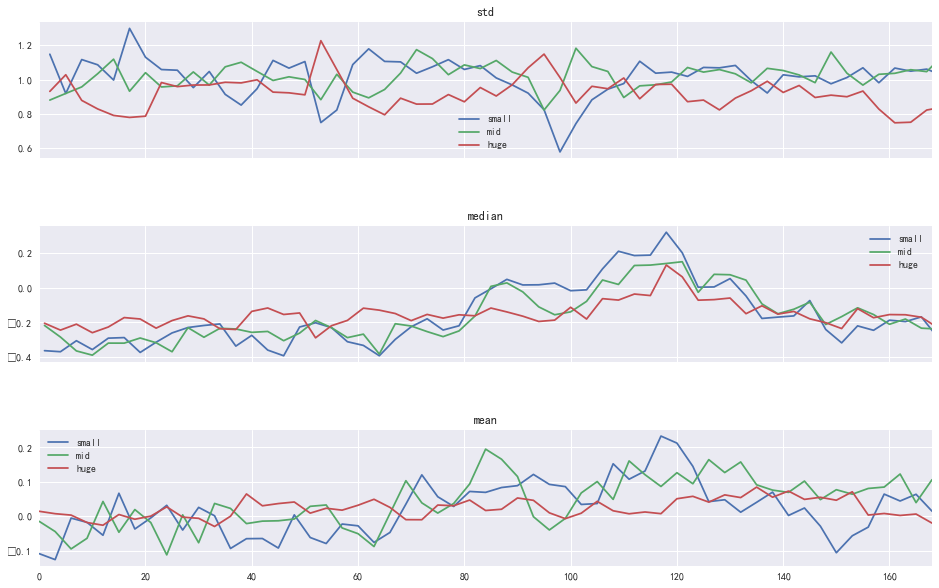

In [739]:
fig, axs = plt.subplots(3,1, figsize=(16, 10), facecolor='w', edgecolor='k',sharex=True)
fig.subplots_adjust(hspace = .5, wspace=.001)
for label,num in zip(set(copydata['stats']),range(len(set(copydata['stats'])))):
    #print label,num
    dataslice = copydata[copydata['stats']==label]
    dataslice.plot(ax=axs[num])
    axs[num].set_title(label)